=== KI·ªÇM TRA PERCEPTRON V·ªöI PH√âP AND ===
B·∫Øt ƒë·∫ßu hu·∫•n luy·ªán...
B·∫Øt ƒë·∫ßu hu·∫•n luy·ªán Perceptron v·ªõi 50 epoch
S·ªë m·∫´u: 4, S·ªë ƒë·∫∑c tr∆∞ng: 2
H·ªôi t·ª• t·∫°i epoch 8

K·∫øt qu·∫£ d·ª± ƒëo√°n cho ph√©p AND:
ƒê·∫ßu v√†o: [0 0] -> D·ª± ƒëo√°n: 0, Th·ª±c t·∫ø: 0 ‚úì ƒê√öNG
ƒê·∫ßu v√†o: [0 1] -> D·ª± ƒëo√°n: 0, Th·ª±c t·∫ø: 0 ‚úì ƒê√öNG
ƒê·∫ßu v√†o: [1 0] -> D·ª± ƒëo√°n: 0, Th·ª±c t·∫ø: 0 ‚úì ƒê√öNG
ƒê·∫ßu v√†o: [1 1] -> D·ª± ƒëo√°n: 1, Th·ª±c t·∫ø: 1 ‚úì ƒê√öNG

Tham s·ªë cu·ªëi c√πng:
Tr·ªçng s·ªë: [0.19675738 0.14075391]
Bias: -0.257

Gi·∫£i th√≠ch:
- Tr·ªçng s·ªë 1 (0.197): ·∫£nh h∆∞·ªüng c·ªßa ƒë·∫ßu v√†o th·ª© nh·∫•t
- Tr·ªçng s·ªë 2 (0.141): ·∫£nh h∆∞·ªüng c·ªßa ƒë·∫ßu v√†o th·ª© hai
- Bias (-0.257): ng∆∞·ª°ng quy·∫øt ƒë·ªãnh
- C√¥ng th·ª©c: ƒë·∫ßu_ra = step(0.197*x1 + 0.141*x2 + -0.257)

V·∫Ω bi·ªÉu ƒë·ªì qu√° tr√¨nh hu·∫•n luy·ªán...


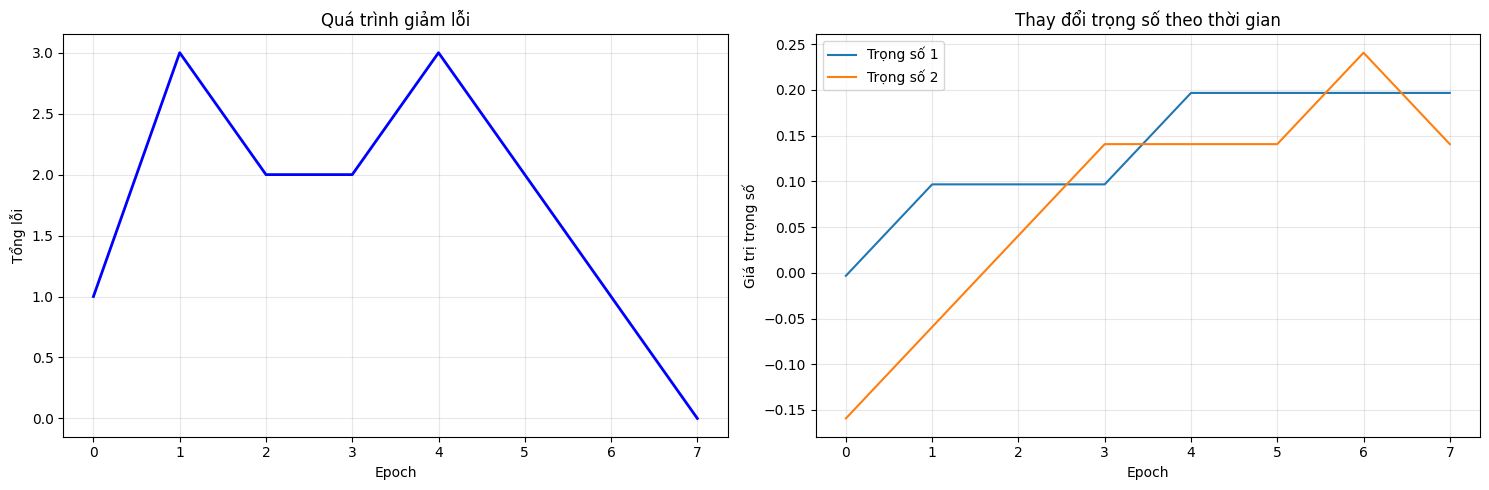

In [4]:
"""
Ph·∫ßn 1: Perceptron - Neuron ƒë∆°n gi·∫£n nh·∫•t

Perceptron l√† ƒë∆°n v·ªã t√≠nh to√°n c∆° b·∫£n nh·∫•t trong neural networks, ƒë∆∞·ª£c l·∫•y c·∫£m h·ª©ng t·ª´ neuron sinh h·ªçc. 
Gi·ªëng nh∆∞ neuron th·∫≠t nh·∫≠n t√≠n hi·ªáu t·ª´ c√°c neuron kh√°c qua synapse, perceptron nh·∫≠n ƒë·∫ßu v√†o t·ª´ nhi·ªÅu ngu·ªìn, 
x·ª≠ l√Ω ch√∫ng, v√† t·∫°o ra m·ªôt t√≠n hi·ªáu ƒë·∫ßu ra.

H√£y t∆∞·ªüng t∆∞·ª£ng perceptron nh∆∞ m·ªôt ng∆∞·ªùi b·∫£o v·ªá th√¥ng minh. Ng∆∞·ªùi n√†y nh·∫≠n th√¥ng tin t·ª´ nhi·ªÅu ngu·ªìn kh√°c nhau 
(tu·ªïi c·ªßa kh√°ch, c√°ch ƒÉn m·∫∑c, th√°i ƒë·ªô), g√°n tr·ªçng s·ªë kh√°c nhau cho t·ª´ng th√¥ng tin (tu·ªïi quan tr·ªçng h∆°n c√°ch ƒÉn m·∫∑c), 
t√≠nh t·ªïng ƒëi·ªÉm, v√† quy·∫øt ƒë·ªãnh c√≥ cho ph√©p v√†o hay kh√¥ng d·ª±a tr√™n m·ªôt ng∆∞·ª°ng nh·∫•t ƒë·ªãnh.
"""

# Import c√°c th∆∞ vi·ªán c·∫ßn thi·∫øt
import numpy as np              # Th∆∞ vi·ªán t√≠nh to√°n s·ªë h·ªçc
import matplotlib.pyplot as plt # Th∆∞ vi·ªán v·∫Ω bi·ªÉu ƒë·ªì
from typing import Callable, List, Tuple  # Type hints cho code r√µ r√†ng h∆°n
import warnings
warnings.filterwarnings('ignore')  # T·∫Øt c√°c c·∫£nh b√°o kh√¥ng c·∫ßn thi·∫øt

class Perceptron:
    """
    L·ªõp Perceptron ƒë∆°n gi·∫£n - ƒë∆°n v·ªã c∆° b·∫£n c·ªßa neural networks
    
    C·∫•u tr√∫c c·ªßa Perceptron:
    1. Nh·∫≠n ƒë·∫ßu v√†o (inputs)
    2. Nh√¢n v·ªõi tr·ªçng s·ªë (weights) 
    3. C·ªông bias
    4. √Åp d·ª•ng h√†m k√≠ch ho·∫°t
    5. T·∫°o ra ƒë·∫ßu ra
    """
    
    def __init__(self, so_dau_vao: int, he_so_hoc: float = 0.01):
        """
        Kh·ªüi t·∫°o Perceptron v·ªõi c√°c tham s·ªë ban ƒë·∫ßu
        
        Args:
            so_dau_vao: S·ªë l∆∞·ª£ng ƒë·∫∑c tr∆∞ng ƒë·∫ßu v√†o (v√≠ d·ª•: 2 cho ph√©p AND c√≥ 2 input)
            he_so_hoc: T·ªëc ƒë·ªô h·ªçc (learning rate) - quy·∫øt ƒë·ªãnh t·ªëc ƒë·ªô c·∫≠p nh·∫≠t tr·ªçng s·ªë
        """
        self.so_dau_vao = so_dau_vao  # L∆∞u s·ªë ƒë·∫ßu v√†o
        self.he_so_hoc = he_so_hoc    # L∆∞u t·ªëc ƒë·ªô h·ªçc
        
        # Kh·ªüi t·∫°o tr·ªçng s·ªë ng·∫´u nhi√™n nh·ªè (g·∫ßn 0 ƒë·ªÉ tr√°nh b√£o h√≤a)
        # M·ªói ƒë·∫ßu v√†o s·∫Ω c√≥ m·ªôt tr·ªçng s·ªë t∆∞∆°ng ·ª©ng
        self.trong_so = np.random.normal(0, 0.1, so_dau_vao)
        
        # Bias gi√∫p perceptron linh ho·∫°t h∆°n trong vi·ªác ph√¢n lo·∫°i
        # Gi·ªëng nh∆∞ vi·ªác ƒëi·ªÅu ch·ªânh ng∆∞·ª°ng quy·∫øt ƒë·ªãnh
        self.bias = np.random.normal(0, 0.1)
        
        # L∆∞u tr·ªØ l·ªãch s·ª≠ hu·∫•n luy·ªán ƒë·ªÉ theo d√µi qu√° tr√¨nh h·ªçc
        self.lich_su_loss = []      # L·ªãch s·ª≠ l·ªói qua c√°c epoch
        self.lich_su_trong_so = []  # L·ªãch s·ª≠ thay ƒë·ªïi tr·ªçng s·ªë
    
    def ham_kich_hoat(self, x: float) -> float:
        """
        H√†m k√≠ch ho·∫°t step function (ng∆∞·ª°ng c·ª©ng)
        
        Args:
            x: Gi√° tr·ªã ƒë·∫ßu v√†o (t·ªïng c√≥ tr·ªçng s·ªë)
            
        Returns:
            1 n·∫øu x >= 0, ng∆∞·ª£c l·∫°i tr·∫£ v·ªÅ 0
            
        V√≠ d·ª•: Gi·ªëng nh∆∞ c√¥ng t·∫Øc ƒë√®n - b·∫≠t (1) ho·∫∑c t·∫Øt (0)
        """
        return 1 if x >= 0 else 0
    
    def ham_kich_hoat_sigmoid(self, x: float) -> float:
        """
        H√†m sigmoid ƒë·ªÉ c√≥ ƒë·∫ßu ra li√™n t·ª•c (m∆∞·ª£t m√† h∆°n step function)
        
        Args:
            x: Gi√° tr·ªã ƒë·∫ßu v√†o
            
        Returns:
            Gi√° tr·ªã trong kho·∫£ng (0, 1)
            
        Sigmoid c√≥ d·∫°ng: f(x) = 1 / (1 + e^(-x))
        - Khi x r·∫•t l·ªõn: f(x) ‚âà 1
        - Khi x r·∫•t nh·ªè: f(x) ‚âà 0  
        - Khi x = 0: f(x) = 0.5
        """
        # Gi·ªõi h·∫°n x ƒë·ªÉ tr√°nh overflow (tr√†n s·ªë)
        x = np.clip(x, -500, 500)
        return 1 / (1 + np.exp(-x))
    
    def du_doan(self, X: np.ndarray, su_dung_sigmoid: bool = False) -> np.ndarray:
        """
        D·ª± ƒëo√°n ƒë·∫ßu ra cho m·ªôt ho·∫∑c nhi·ªÅu m·∫´u
        
        Quy tr√¨nh d·ª± ƒëo√°n:
        1. T√≠nh t√≠ch v√¥ h∆∞·ªõng: X ¬∑ W (ƒë·∫ßu v√†o nh√¢n tr·ªçng s·ªë)
        2. C·ªông bias: X ¬∑ W + b
        3. √Åp d·ª•ng h√†m k√≠ch ho·∫°t
        
        Args:
            X: Ma tr·∫≠n ƒë·∫ßu v√†o shape (n_samples, n_features) ho·∫∑c (n_features,)
            su_dung_sigmoid: S·ª≠ d·ª•ng sigmoid thay v√¨ step function
        
        Returns:
            M·∫£ng d·ª± ƒëo√°n v·ªõi gi√° tr·ªã 0 ho·∫∑c 1 (ho·∫∑c x√°c su·∫•t n·∫øu d√πng sigmoid)
        """
        # ƒê·∫£m b·∫£o X c√≥ ƒë√∫ng k√≠ch th∆∞·ªõc (ma tr·∫≠n 2D)
        if X.ndim == 1:
            X = X.reshape(1, -1)  # Chuy·ªÉn t·ª´ vector th√†nh ma tr·∫≠n 1 h√†ng
        
        # B∆∞·ªõc 1 & 2: T√≠nh t·ªïng c√≥ tr·ªçng s·ªë (weighted sum)
        # z = x1*w1 + x2*w2 + ... + xn*wn + bias
        z = np.dot(X, self.trong_so) + self.bias
        
        # B∆∞·ªõc 3: √Åp d·ª•ng h√†m k√≠ch ho·∫°t
        if su_dung_sigmoid:
            # S·ª≠ d·ª•ng sigmoid cho ƒë·∫ßu ra li√™n t·ª•c
            return np.array([self.ham_kich_hoat_sigmoid(zi) for zi in z])
        else:
            # S·ª≠ d·ª•ng step function cho ƒë·∫ßu ra nh·ªã ph√¢n
            return np.array([self.ham_kich_hoat(zi) for zi in z])
    
    def huan_luyen(self, X: np.ndarray, y: np.ndarray, so_epoch: int = 100, in_qua_trinh: bool = True):
        """
        Hu·∫•n luy·ªán Perceptron v·ªõi thu·∫≠t to√°n h·ªçc c√≥ gi√°m s√°t (Supervised Learning)
        
        Thu·∫≠t to√°n Perceptron Learning:
        1. Kh·ªüi t·∫°o tr·ªçng s·ªë ng·∫´u nhi√™n
        2. V·ªõi m·ªói m·∫´u hu·∫•n luy·ªán:
           - D·ª± ƒëo√°n ƒë·∫ßu ra
           - T√≠nh l·ªói = nh√£n th·ª±c - d·ª± ƒëo√°n  
           - C·∫≠p nh·∫≠t tr·ªçng s·ªë: w = w + Œ± √ó l·ªói √ó ƒë·∫ßu_v√†o
           - C·∫≠p nh·∫≠t bias: b = b + Œ± √ó l·ªói
        3. L·∫∑p l·∫°i cho ƒë·∫øn khi h·ªôi t·ª• ho·∫∑c ƒë·∫°t s·ªë epoch
        
        Args:
            X: Ma tr·∫≠n ƒë·∫∑c tr∆∞ng shape (n_samples, n_features)
            y: Vector nh√£n shape (n_samples,) v·ªõi gi√° tr·ªã 0 ho·∫∑c 1
            so_epoch: S·ªë epoch hu·∫•n luy·ªán (m·ªôt epoch = m·ªôt l·∫ßn duy·ªát qua to√†n b·ªô d·ªØ li·ªáu)
            in_qua_trinh: In th√¥ng tin qu√° tr√¨nh hu·∫•n luy·ªán
        """
        if in_qua_trinh:
            print(f"B·∫Øt ƒë·∫ßu hu·∫•n luy·ªán Perceptron v·ªõi {so_epoch} epoch")
            print(f"S·ªë m·∫´u: {len(X)}, S·ªë ƒë·∫∑c tr∆∞ng: {X.shape[1]}")
        
        # L·∫∑p qua t·ª´ng epoch
        for epoch in range(so_epoch):
            tong_loi = 0  # ƒê·∫øm t·ªïng s·ªë l·ªói trong epoch n√†y
            
            # L∆∞u tr·ªçng s·ªë hi·ªán t·∫°i ƒë·ªÉ theo d√µi s·ª± thay ƒë·ªïi
            self.lich_su_trong_so.append(self.trong_so.copy())
            
            # Duy·ªát qua t·ª´ng m·∫´u hu·∫•n luy·ªán
            for i in range(len(X)):
                # B∆∞·ªõc 1: D·ª± ƒëo√°n v·ªõi tr·ªçng s·ªë hi·ªán t·∫°i
                du_doan = self.du_doan(X[i])
                
                # B∆∞·ªõc 2: T√≠nh l·ªói
                # l·ªói = nh√£n_th·ª±c - d·ª±_ƒëo√°n
                # l·ªói = 0: d·ª± ƒëo√°n ƒë√∫ng, kh√¥ng c·∫ßn c·∫≠p nh·∫≠t
                # l·ªói = 1: d·ª± ƒëo√°n 0 nh∆∞ng th·ª±c t·∫ø 1, c·∫ßn tƒÉng tr·ªçng s·ªë
                # l·ªói = -1: d·ª± ƒëo√°n 1 nh∆∞ng th·ª±c t·∫ø 0, c·∫ßn gi·∫£m tr·ªçng s·ªë
                loi = y[i] - du_doan[0]
                
                # B∆∞·ªõc 3: C·∫≠p nh·∫≠t tr·ªçng s·ªë n·∫øu c√≥ l·ªói
                if loi != 0:
                    # C√¥ng th·ª©c c·∫≠p nh·∫≠t Perceptron:
                    # w_new = w_old + Œ± √ó l·ªói √ó x
                    # N·∫øu l·ªói > 0: tƒÉng tr·ªçng s·ªë theo h∆∞·ªõng ƒë·∫ßu v√†o
                    # N·∫øu l·ªói < 0: gi·∫£m tr·ªçng s·ªë theo h∆∞·ªõng ƒë·∫ßu v√†o
                    self.trong_so += self.he_so_hoc * loi * X[i]
                    
                    # C·∫≠p nh·∫≠t bias t∆∞∆°ng t·ª±
                    self.bias += self.he_so_hoc * loi
                    
                    # ƒê·∫øm l·ªói ƒë·ªÉ theo d√µi
                    tong_loi += abs(loi)
            
            # L∆∞u l·ªãch s·ª≠ l·ªói
            self.lich_su_loss.append(tong_loi)
            
            # In th√¥ng tin ti·∫øn tr√¨nh m·ªói 20 epoch
            if in_qua_trinh and (epoch + 1) % 20 == 0:
                do_chinh_xac = self.danh_gia(X, y)
                print(f"Epoch {epoch + 1}/{so_epoch}: L·ªói = {tong_loi}, ƒê·ªô ch√≠nh x√°c = {do_chinh_xac:.3f}")
            
            # D·ª´ng s·ªõm n·∫øu kh√¥ng c√≤n l·ªói (ƒë√£ h·ªôi t·ª•)
            if tong_loi == 0:
                if in_qua_trinh:
                    print(f"H·ªôi t·ª• t·∫°i epoch {epoch + 1}")
                break
    
    def danh_gia(self, X: np.ndarray, y: np.ndarray) -> float:
        """
        ƒê√°nh gi√° ƒë·ªô ch√≠nh x√°c c·ªßa m√¥ h√¨nh
        
        Args:
            X: D·ªØ li·ªáu ƒë·∫ßu v√†o
            y: Nh√£n th·ª±c t·∫ø
            
        Returns:
            ƒê·ªô ch√≠nh x√°c (accuracy) t·ª´ 0 ƒë·∫øn 1
        """
        du_doan = self.du_doan(X)  # D·ª± ƒëo√°n cho to√†n b·ªô d·ªØ li·ªáu
        # T√≠nh t·ª∑ l·ªá d·ª± ƒëo√°n ƒë√∫ng
        return np.mean(du_doan == y)
    
    def ve_bieu_do_huan_luyen(self):
        """
        V·∫Ω bi·ªÉu ƒë·ªì tr·ª±c quan h√≥a qu√° tr√¨nh hu·∫•n luy·ªán
        
        G·ªìm 2 bi·ªÉu ƒë·ªì:
        1. Bi·ªÉu ƒë·ªì l·ªói theo epoch (ƒë·ªÉ xem m√¥ h√¨nh c√≥ h·ªôi t·ª• kh√¥ng)
        2. Bi·ªÉu ƒë·ªì thay ƒë·ªïi tr·ªçng s·ªë (ƒë·ªÉ hi·ªÉu c√°ch m√¥ h√¨nh h·ªçc)
        """
        fig, axes = plt.subplots(1, 2, figsize=(15, 5))
        
        # Bi·ªÉu ƒë·ªì 1: L·ªói gi·∫£m theo th·ªùi gian
        axes[0].plot(self.lich_su_loss, 'b-', linewidth=2)
        axes[0].set_title('Qu√° tr√¨nh gi·∫£m l·ªói')
        axes[0].set_xlabel('Epoch')
        axes[0].set_ylabel('T·ªïng l·ªói')
        axes[0].grid(True, alpha=0.3)
        
        # Bi·ªÉu ƒë·ªì 2: Thay ƒë·ªïi tr·ªçng s·ªë theo th·ªùi gian
        if len(self.lich_su_trong_so) > 0:
            trong_so_array = np.array(self.lich_su_trong_so)
            # V·∫Ω ƒë∆∞·ªùng cho m·ªói tr·ªçng s·ªë
            for i in range(self.so_dau_vao):
                axes[1].plot(trong_so_array[:, i], label=f'Tr·ªçng s·ªë {i+1}')
            
            axes[1].set_title('Thay ƒë·ªïi tr·ªçng s·ªë theo th·ªùi gian')
            axes[1].set_xlabel('Epoch')
            axes[1].set_ylabel('Gi√° tr·ªã tr·ªçng s·ªë')
            axes[1].legend()
            axes[1].grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()

# ===== DEMO: KI·ªÇM TRA PERCEPTRON V·ªöI PH√âP AND =====
print("=== KI·ªÇM TRA PERCEPTRON V·ªöI PH√âP AND ===")

# T·∫°o d·ªØ li·ªáu cho ph√©p AND logic
# Ph√©p AND ch·ªâ tr·∫£ v·ªÅ 1 khi c·∫£ hai ƒë·∫ßu v√†o ƒë·ªÅu l√† 1
X_and = np.array([[0, 0],    # 0 AND 0 = 0
                  [0, 1],    # 0 AND 1 = 0  
                  [1, 0],    # 1 AND 0 = 0
                  [1, 1]])   # 1 AND 1 = 1

y_and = np.array([0, 0, 0, 1])  # K·∫øt qu·∫£ t∆∞∆°ng ·ª©ng

# T·∫°o v√† c·∫•u h√¨nh Perceptron
# so_dau_vao=2: v√¨ ph√©p AND c√≥ 2 ƒë·∫ßu v√†o
# he_so_hoc=0.1: t·ªëc ƒë·ªô h·ªçc v·ª´a ph·∫£i (kh√¥ng qu√° nhanh, kh√¥ng qu√° ch·∫≠m)
perceptron_and = Perceptron(so_dau_vao=2, he_so_hoc=0.1)

# Hu·∫•n luy·ªán m√¥ h√¨nh
print("B·∫Øt ƒë·∫ßu hu·∫•n luy·ªán...")
perceptron_and.huan_luyen(X_and, y_and, so_epoch=50)

# Ki·ªÉm tra k·∫øt qu·∫£ sau hu·∫•n luy·ªán
print(f"\nK·∫øt qu·∫£ d·ª± ƒëo√°n cho ph√©p AND:")
for i, (x, y_thuc) in enumerate(zip(X_and, y_and)):
    y_du_doan = perceptron_and.du_doan(x)[0]
    ket_qua = "‚úì ƒê√öNG" if y_du_doan == y_thuc else "‚úó SAI"
    print(f"ƒê·∫ßu v√†o: {x} -> D·ª± ƒëo√°n: {y_du_doan}, Th·ª±c t·∫ø: {y_thuc} {ket_qua}")

# Hi·ªÉn th·ªã tham s·ªë ƒë√£ h·ªçc ƒë∆∞·ª£c
print(f"\nTham s·ªë cu·ªëi c√πng:")
print(f"Tr·ªçng s·ªë: {perceptron_and.trong_so}")
print(f"Bias: {perceptron_and.bias:.3f}")

# Gi·∫£i th√≠ch √Ω nghƒ©a tr·ªçng s·ªë:
print(f"\nGi·∫£i th√≠ch:")
print(f"- Tr·ªçng s·ªë 1 ({perceptron_and.trong_so[0]:.3f}): ·∫£nh h∆∞·ªüng c·ªßa ƒë·∫ßu v√†o th·ª© nh·∫•t")  
print(f"- Tr·ªçng s·ªë 2 ({perceptron_and.trong_so[1]:.3f}): ·∫£nh h∆∞·ªüng c·ªßa ƒë·∫ßu v√†o th·ª© hai")
print(f"- Bias ({perceptron_and.bias:.3f}): ng∆∞·ª°ng quy·∫øt ƒë·ªãnh")
print(f"- C√¥ng th·ª©c: ƒë·∫ßu_ra = step({perceptron_and.trong_so[0]:.3f}*x1 + {perceptron_and.trong_so[1]:.3f}*x2 + {perceptron_and.bias:.3f})")

# V·∫Ω bi·ªÉu ƒë·ªì qu√° tr√¨nh hu·∫•n luy·ªán
print(f"\nV·∫Ω bi·ªÉu ƒë·ªì qu√° tr√¨nh hu·∫•n luy·ªán...")
perceptron_and.ve_bieu_do_huan_luyen()

=== KI·ªÇM TRA PERCEPTRON V·ªöI PH√âP AND ===
B·∫Øt ƒë·∫ßu hu·∫•n luy·ªán...
B·∫Øt ƒë·∫ßu hu·∫•n luy·ªán Perceptron v·ªõi 50 epoch
S·ªë m·∫´u: 4, S·ªë ƒë·∫∑c tr∆∞ng: 2
H·ªôi t·ª• t·∫°i epoch 7

K·∫øt qu·∫£ d·ª± ƒëo√°n cho ph√©p AND:
ƒê·∫ßu v√†o: [0 0] -> D·ª± ƒëo√°n: 0, Th·ª±c t·∫ø: 0 ‚úì ƒê√öNG
ƒê·∫ßu v√†o: [0 1] -> D·ª± ƒëo√°n: 0, Th·ª±c t·∫ø: 0 ‚úì ƒê√öNG
ƒê·∫ßu v√†o: [1 0] -> D·ª± ƒëo√°n: 0, Th·ª±c t·∫ø: 0 ‚úì ƒê√öNG
ƒê·∫ßu v√†o: [1 1] -> D·ª± ƒëo√°n: 1, Th·ª±c t·∫ø: 1 ‚úì ƒê√öNG

Tham s·ªë cu·ªëi c√πng:
Tr·ªçng s·ªë: [0.2097605  0.15903685]
Bias: -0.283

Gi·∫£i th√≠ch:
- Tr·ªçng s·ªë 1 (0.210): ·∫£nh h∆∞·ªüng c·ªßa ƒë·∫ßu v√†o th·ª© nh·∫•t
- Tr·ªçng s·ªë 2 (0.159): ·∫£nh h∆∞·ªüng c·ªßa ƒë·∫ßu v√†o th·ª© hai
- Bias (-0.283): ng∆∞·ª°ng quy·∫øt ƒë·ªãnh
- C√¥ng th·ª©c: ƒë·∫ßu_ra = step(0.210*x1 + 0.159*x2 + -0.283)

V·∫Ω bi·ªÉu ƒë·ªì qu√° tr√¨nh hu·∫•n luy·ªán...


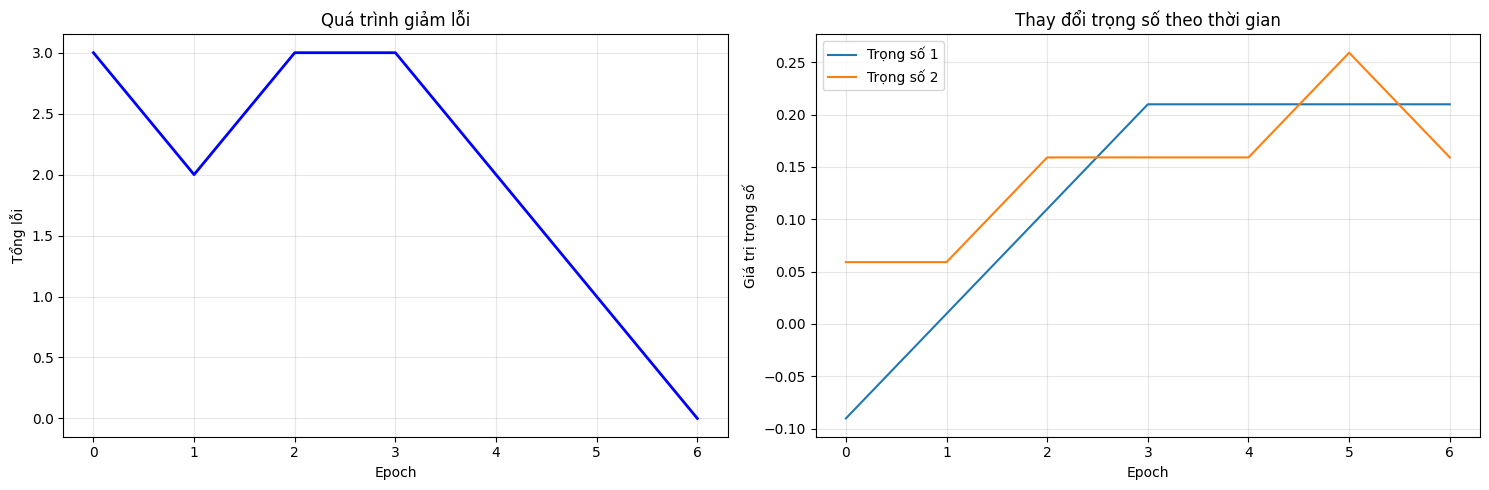


H·∫†N CH·∫æ C·ª¶A PERCEPTRON: B√ÄI TO√ÅN XOR
D·ªØ li·ªáu XOR:
ƒê·∫ßu v√†o [0,0] -> 0 (c·∫£ hai ƒë·ªÅu 0)
ƒê·∫ßu v√†o [0,1] -> 1 (kh√°c nhau)
ƒê·∫ßu v√†o [1,0] -> 1 (kh√°c nhau)
ƒê·∫ßu v√†o [1,1] -> 0 (c·∫£ hai ƒë·ªÅu 1)

Th·ª≠ hu·∫•n luy·ªán Perceptron h·ªçc XOR...
(D·ª± ƒëo√°n: s·∫Ω TH·∫§T B·∫†I v√¨ XOR kh√¥ng ph·∫£i b√†i to√°n tuy·∫øn t√≠nh)
B·∫Øt ƒë·∫ßu hu·∫•n luy·ªán Perceptron v·ªõi 100 epoch
S·ªë m·∫´u: 4, S·ªë ƒë·∫∑c tr∆∞ng: 2
Epoch 20/100: L·ªói = 4, ƒê·ªô ch√≠nh x√°c = 0.500
Epoch 40/100: L·ªói = 4, ƒê·ªô ch√≠nh x√°c = 0.500
Epoch 60/100: L·ªói = 4, ƒê·ªô ch√≠nh x√°c = 0.500
Epoch 80/100: L·ªói = 4, ƒê·ªô ch√≠nh x√°c = 0.500
Epoch 100/100: L·ªói = 4, ƒê·ªô ch√≠nh x√°c = 0.500

K·∫øt qu·∫£ d·ª± ƒëo√°n cho ph√©p XOR:
ƒê·∫ßu v√†o: [0 0] -> D·ª± ƒëo√°n: 1, Th·ª±c t·∫ø: 0 ‚úó SAI
ƒê·∫ßu v√†o: [0 1] -> D·ª± ƒëo√°n: 1, Th·ª±c t·∫ø: 1 ‚úì ƒê√öNG
ƒê·∫ßu v√†o: [1 0] -> D·ª± ƒëo√°n: 0, Th·ª±c t·∫ø: 1 ‚úó SAI
ƒê·∫ßu v√†o: [1 1] -> D·ª± ƒëo√°n: 0, Th·ª±c t·∫ø: 0 ‚úì ƒê√öNG

ƒê·ªô ch√≠nh x

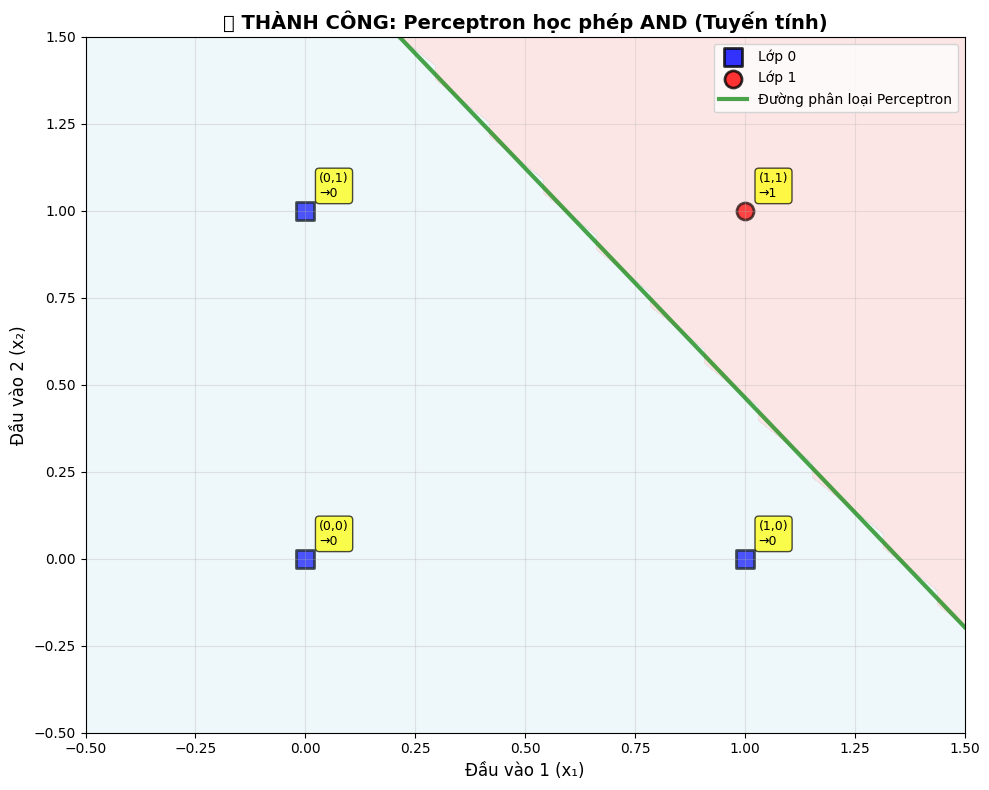

2. Perceptron th·∫•t b·∫°i v·ªõi ph√©p XOR


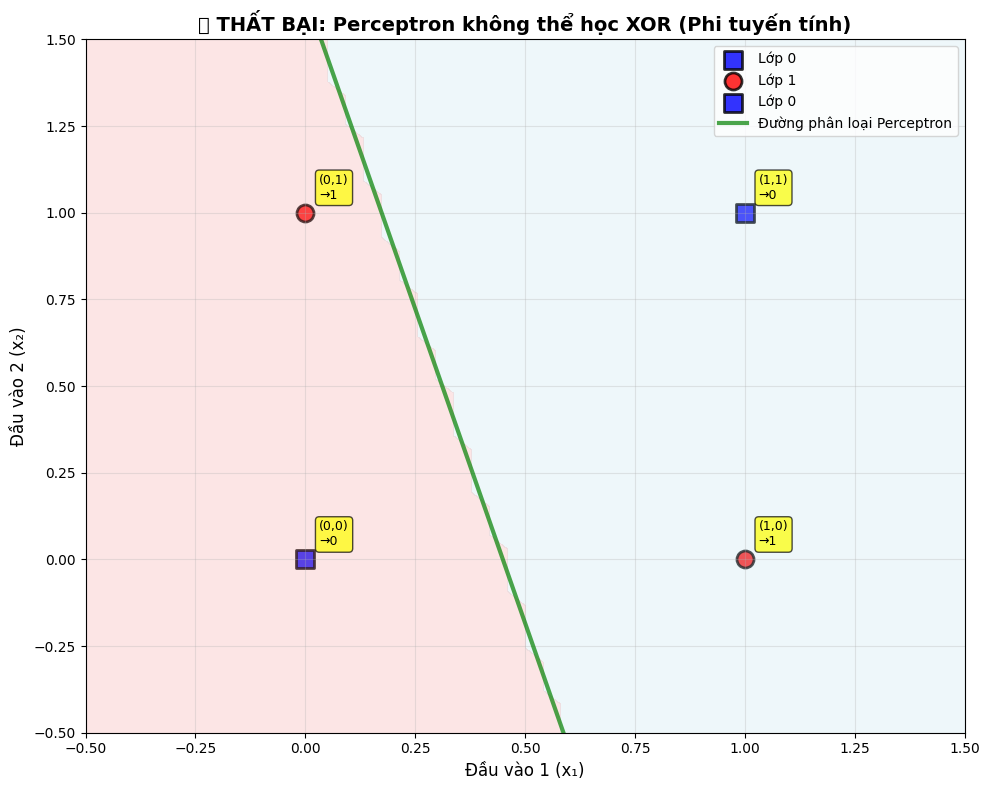


PH√ÇN T√çCH CHI TI·∫æT:

üîπ Ph√©p AND (Linearly Separable - T√°ch bi·ªát ƒë∆∞·ª£c b·∫±ng ƒë∆∞·ªùng th·∫≥ng):
   ƒêi·ªÉm (0,0)‚Üí0 v√† (0,1)‚Üí0 v√† (1,0)‚Üí0 ·ªü m·ªôt ph√≠a
   ƒêi·ªÉm (1,1)‚Üí1 ·ªü ph√≠a kia
   ‚ûú C√ì TH·ªÇ v·∫Ω m·ªôt ƒë∆∞·ªùng th·∫≥ng t√°ch bi·ªát hai nh√≥m

üîπ Ph√©p XOR (Not Linearly Separable - KH√îNG t√°ch bi·ªát ƒë∆∞·ª£c b·∫±ng ƒë∆∞·ªùng th·∫≥ng):
   ƒêi·ªÉm (0,0)‚Üí0 v√† (1,1)‚Üí0 ·ªü c√°c g√≥c ƒë·ªëi di·ªán
   ƒêi·ªÉm (0,1)‚Üí1 v√† (1,0)‚Üí1 ·ªü c√°c g√≥c ƒë·ªëi di·ªán kh√°c
   ‚ûú KH√îNG TH·ªÇ v·∫Ω m·ªôt ƒë∆∞·ªùng th·∫≥ng n√†o t√°ch bi·ªát ƒë∆∞·ª£c

üîß Gi·∫£i ph√°p cho b√†i to√°n XOR:
1. Multi-Layer Perceptron (MLP) - Nhi·ªÅu l·ªõp Perceptron
2. Neural Networks v·ªõi hidden layers
3. C√°c m√¥ h√¨nh phi tuy·∫øn t√≠nh kh√°c

üìä K·∫øt qu·∫£ so s√°nh:
   AND: ƒê·ªô ch√≠nh x√°c = 100.0%
   XOR: ƒê·ªô ch√≠nh x√°c = 50.0%

Bi·ªÉu ƒë·ªì qu√° tr√¨nh hu·∫•n luy·ªán XOR (kh√¥ng h·ªôi t·ª•):


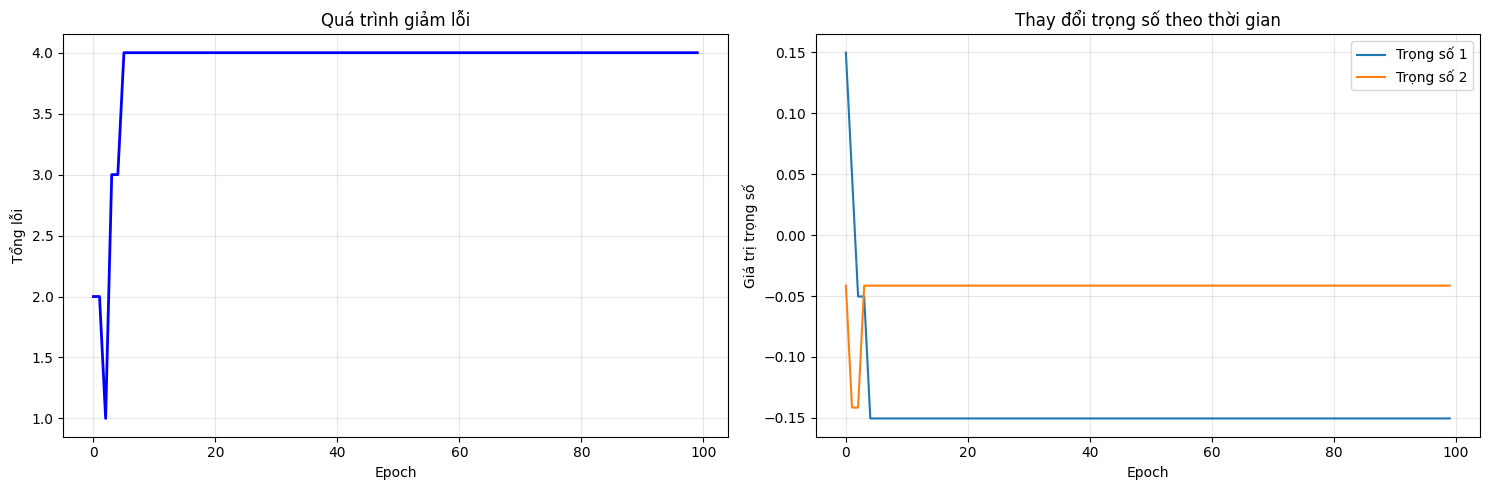

In [ ]:
"""
H·∫†N CH·∫æ QUAN TR·ªåNG C·ª¶A PERCEPTRON:
Perceptron ch·ªâ c√≥ th·ªÉ gi·∫£i quy·∫øt nh·ªØng b√†i to√°n PH√ÇN LO·∫†I TUY·∫æN T√çNH.

ƒêi·ªÅu n√†y c√≥ nghƒ©a l√†:
- C√°c l·ªõp d·ªØ li·ªáu ph·∫£i c√≥ th·ªÉ t√°ch bi·ªát b·∫±ng m·ªôt ƒê∆Ø·ªúNG TH·∫≤NG (trong 2D) 
- Ho·∫∑c m·ªôt SI√äU PH·∫≤NG (hyperplane) trong kh√¥ng gian nhi·ªÅu chi·ªÅu

B√†i to√°n XOR l√† v√≠ d·ª• ƒëi·ªÉn h√¨nh v·ªÅ b√†i to√°n KH√îNG TUY·∫æN T√çNH:
- Kh√¥ng th·ªÉ v·∫Ω m·ªôt ƒë∆∞·ªùng th·∫≥ng n√†o ƒë·ªÉ t√°ch bi·ªát ƒë∆∞·ª£c c√°c ƒëi·ªÉm XOR
- Do ƒë√≥ Perceptron s·∫Ω TH·∫§T B·∫†I ho√†n to√†n v·ªõi XOR
"""

print("\n" + "="*50)
print("H·∫†N CH·∫æ C·ª¶A PERCEPTRON: B√ÄI TO√ÅN XOR")
print("="*50)

# T·∫°o d·ªØ li·ªáu cho ph√©p XOR (Exclusive OR)
# XOR ch·ªâ tr·∫£ v·ªÅ 1 khi hai ƒë·∫ßu v√†o KH√ÅC NHAU
X_xor = np.array([[0, 0],    # 0 XOR 0 = 0 (gi·ªëng nhau)
                  [0, 1],    # 0 XOR 1 = 1 (kh√°c nhau)
                  [1, 0],    # 1 XOR 0 = 1 (kh√°c nhau)  
                  [1, 1]])   # 1 XOR 1 = 0 (gi·ªëng nhau)

y_xor = np.array([0, 1, 1, 0])  # K·∫øt qu·∫£ XOR t∆∞∆°ng ·ª©ng

print("D·ªØ li·ªáu XOR:")
print("ƒê·∫ßu v√†o [0,0] -> 0 (c·∫£ hai ƒë·ªÅu 0)")
print("ƒê·∫ßu v√†o [0,1] -> 1 (kh√°c nhau)")  
print("ƒê·∫ßu v√†o [1,0] -> 1 (kh√°c nhau)")
print("ƒê·∫ßu v√†o [1,1] -> 0 (c·∫£ hai ƒë·ªÅu 1)")

# T·∫°o Perceptron ƒë·ªÉ th·ª≠ h·ªçc XOR
perceptron_xor = Perceptron(so_dau_vao=2, he_so_hoc=0.1)

print("\nTh·ª≠ hu·∫•n luy·ªán Perceptron h·ªçc XOR...")
print("(D·ª± ƒëo√°n: s·∫Ω TH·∫§T B·∫†I v√¨ XOR kh√¥ng ph·∫£i b√†i to√°n tuy·∫øn t√≠nh)")

# Hu·∫•n luy·ªán v·ªõi nhi·ªÅu epoch h∆°n ƒë·ªÉ ch·∫Øc ch·∫Øn
perceptron_xor.huan_luyen(X_xor, y_xor, so_epoch=100)

# Ki·ªÉm tra k·∫øt qu·∫£ (s·∫Ω th·∫•t b·∫°i)
print(f"\nK·∫øt qu·∫£ d·ª± ƒëo√°n cho ph√©p XOR:")
tong_dung = 0
for i, (x, y_thuc) in enumerate(zip(X_xor, y_xor)):
    y_du_doan = perceptron_xor.du_doan(x)[0]
    ket_qua = "‚úì ƒê√öNG" if y_du_doan == y_thuc else "‚úó SAI"
    if y_du_doan == y_thuc:
        tong_dung += 1
    print(f"ƒê·∫ßu v√†o: {x} -> D·ª± ƒëo√°n: {y_du_doan}, Th·ª±c t·∫ø: {y_thuc} {ket_qua}")

# T√≠nh ƒë·ªô ch√≠nh x√°c
do_chinh_xac = perceptron_xor.danh_gia(X_xor, y_xor)
print(f"\nƒê·ªô ch√≠nh x√°c XOR: {do_chinh_xac:.3f} ({tong_dung}/4 m·∫´u ƒë√∫ng)")

# Gi·∫£i th√≠ch t·∫°i sao th·∫•t b·∫°i
print(f"\n" + "="*60)
print("T·∫†I SAO PERCEPTRON TH·∫§T B·∫†I V·ªöI XOR?")
print("="*60)
print("1. Perceptron ch·ªâ t·∫°o ra ƒë∆∞·ª£c ƒë∆∞·ªùng ph√¢n lo·∫°i TUY·∫æN T√çNH")
print("2. XOR c·∫ßn ƒë∆∞·ªùng ph√¢n lo·∫°i KH√îNG TUY·∫æN T√çNH (cong ho·∫∑c nhi·ªÅu ƒëo·∫°n)")
print("3. Kh√¥ng th·ªÉ v·∫Ω M·ªòT ƒê∆Ø·ªúNG TH·∫≤NG n√†o t√°ch bi·ªát ƒë∆∞·ª£c c√°c ƒëi·ªÉm XOR")
print("4. Do ƒë√≥ Perceptron kh√¥ng bao gi·ªù h·ªôi t·ª• ƒë∆∞·ª£c v·ªõi XOR")

def ve_duong_phan_loai_2d(perceptron, X, y, tieu_de="ƒê∆∞·ªùng ph√¢n lo·∫°i"):
    """
    V·∫Ω ƒë∆∞·ªùng ph√¢n lo·∫°i cho b√†i to√°n 2D ƒë·ªÉ tr·ª±c quan h√≥a
    
    M·ª•c ƒë√≠ch:
    - Gi√∫p hi·ªÉu t·∫°i sao Perceptron th√†nh c√¥ng v·ªõi AND nh∆∞ng th·∫•t b·∫°i v·ªõi XOR
    - Th·∫•y r√µ s·ª± kh√°c bi·ªát gi·ªØa b√†i to√°n tuy·∫øn t√≠nh v√† phi tuy·∫øn t√≠nh
    
    Args:
        perceptron: M√¥ h√¨nh Perceptron ƒë√£ hu·∫•n luy·ªán
        X: D·ªØ li·ªáu ƒë·∫ßu v√†o (2D)
        y: Nh√£n l·ªõp (0 ho·∫∑c 1)
        tieu_de: Ti√™u ƒë·ªÅ bi·ªÉu ƒë·ªì
    """
    plt.figure(figsize=(10, 8))
    
    # B∆∞·ªõc 1: V·∫Ω c√°c ƒëi·ªÉm d·ªØ li·ªáu v·ªõi m√†u s·∫Øc v√† h√¨nh d·∫°ng kh√°c nhau
    for i in range(len(X)):
        # L·ªõp 0: m√†u xanh, h√¨nh vu√¥ng
        # L·ªõp 1: m√†u ƒë·ªè, h√¨nh tr√≤n
        mau = 'red' if y[i] == 1 else 'blue'
        ky_hieu = 'o' if y[i] == 1 else 's'  # 'o' = tr√≤n, 's' = vu√¥ng
        nhan = f'L·ªõp {y[i]}' if i == 0 or (i > 0 and y[i] != y[i-1]) else ""
        
        plt.scatter(X[i, 0], X[i, 1], c=mau, marker=ky_hieu, s=150, 
                   alpha=0.8, edgecolors='black', linewidth=2, label=nhan)
    
    # B∆∞·ªõc 2: V·∫Ω ƒë∆∞·ªùng ph√¢n lo·∫°i (n·∫øu c√≥ th·ªÉ)
    # ƒê∆∞·ªùng ph√¢n lo·∫°i c√≥ ph∆∞∆°ng tr√¨nh: w1*x1 + w2*x2 + bias = 0
    if abs(perceptron.trong_so[1]) > 1e-10:  # Tr√°nh chia cho s·ªë r·∫•t nh·ªè
        x_min, x_max = -0.5, 1.5
        
        # Gi·∫£i ph∆∞∆°ng tr√¨nh ƒë·ªÉ t√¨m x2 theo x1:
        # w1*x1 + w2*x2 + bias = 0
        # => x2 = -(w1*x1 + bias) / w2
        x1_values = np.linspace(x_min, x_max, 100)
        x2_values = -(perceptron.trong_so[0] * x1_values + perceptron.bias) / perceptron.trong_so[1]
        
        plt.plot(x1_values, x2_values, 'g-', linewidth=3, alpha=0.7, 
                label='ƒê∆∞·ªùng ph√¢n lo·∫°i Perceptron')
        
        # T√¥ m√†u v√πng ph√¢n lo·∫°i ƒë·ªÉ th·∫•y r√µ h∆°n
        x1_mesh, x2_mesh = np.meshgrid(np.linspace(-0.5, 1.5, 50), 
                                       np.linspace(-0.5, 1.5, 50))
        
        # D·ª± ƒëo√°n cho to√†n b·ªô kh√¥ng gian
        mesh_points = np.c_[x1_mesh.ravel(), x2_mesh.ravel()]
        Z = perceptron.du_doan(mesh_points)
        Z = Z.reshape(x1_mesh.shape)
        
        # T√¥ m√†u n·ªÅn cho hai v√πng
        plt.contourf(x1_mesh, x2_mesh, Z, levels=1, alpha=0.2, colors=['lightblue', 'lightcoral'])
    
    # B∆∞·ªõc 3: T√πy ch·ªânh bi·ªÉu ƒë·ªì
    plt.xlim(-0.5, 1.5)
    plt.ylim(-0.5, 1.5)
    plt.xlabel('ƒê·∫ßu v√†o 1 (x‚ÇÅ)', fontsize=12)
    plt.ylabel('ƒê·∫ßu v√†o 2 (x‚ÇÇ)', fontsize=12)
    plt.title(tieu_de, fontsize=14, fontweight='bold')
    plt.legend(fontsize=10)
    plt.grid(True, alpha=0.3)
    
    # Th√™m annotation cho c√°c ƒëi·ªÉm
    for i, (x, y_val) in enumerate(zip(X, y)):
        plt.annotate(f'({x[0]},{x[1]})\n‚Üí{y_val}', 
                    (x[0], x[1]), 
                    xytext=(10, 10), textcoords='offset points',
                    fontsize=9, ha='left',
                    bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.7))
    
    plt.tight_layout()
    plt.show()

# V·∫Ω so s√°nh gi·ªØa AND (th√†nh c√¥ng) v√† XOR (th·∫•t b·∫°i)
print(f"\nV·∫Ω bi·ªÉu ƒë·ªì so s√°nh:")
print("1. Perceptron h·ªçc th√†nh c√¥ng ph√©p AND")
ve_duong_phan_loai_2d(perceptron_and, X_and, y_and, 
                     "‚úÖ TH√ÄNH C√îNG: Perceptron h·ªçc ph√©p AND (Tuy·∫øn t√≠nh)")

print("2. Perceptron th·∫•t b·∫°i v·ªõi ph√©p XOR")  
ve_duong_phan_loai_2d(perceptron_xor, X_xor, y_xor, 
                     "‚ùå TH·∫§T B·∫†I: Perceptron kh√¥ng th·ªÉ h·ªçc XOR (Phi tuy·∫øn t√≠nh)")

# Gi·∫£i th√≠ch chi ti·∫øt h∆°n
print(f"\n" + "="*70)
print("PH√ÇN T√çCH CHI TI·∫æT:")
print("="*70)

print("\nüîπ Ph√©p AND (Linearly Separable - T√°ch bi·ªát ƒë∆∞·ª£c b·∫±ng ƒë∆∞·ªùng th·∫≥ng):")
print("   ƒêi·ªÉm (0,0)‚Üí0 v√† (0,1)‚Üí0 v√† (1,0)‚Üí0 ·ªü m·ªôt ph√≠a")
print("   ƒêi·ªÉm (1,1)‚Üí1 ·ªü ph√≠a kia")  
print("   ‚ûú C√ì TH·ªÇ v·∫Ω m·ªôt ƒë∆∞·ªùng th·∫≥ng t√°ch bi·ªát hai nh√≥m")

print("\nüîπ Ph√©p XOR (Not Linearly Separable - KH√îNG t√°ch bi·ªát ƒë∆∞·ª£c b·∫±ng ƒë∆∞·ªùng th·∫≥ng):")
print("   ƒêi·ªÉm (0,0)‚Üí0 v√† (1,1)‚Üí0 ·ªü c√°c g√≥c ƒë·ªëi di·ªán")
print("   ƒêi·ªÉm (0,1)‚Üí1 v√† (1,0)‚Üí1 ·ªü c√°c g√≥c ƒë·ªëi di·ªán kh√°c")
print("   ‚ûú KH√îNG TH·ªÇ v·∫Ω m·ªôt ƒë∆∞·ªùng th·∫≥ng n√†o t√°ch bi·ªát ƒë∆∞·ª£c")

print(f"\nüîß Gi·∫£i ph√°p cho b√†i to√°n XOR:")
print("1. Multi-Layer Perceptron (MLP) - Nhi·ªÅu l·ªõp Perceptron")
print("2. Neural Networks v·ªõi hidden layers")
print("3. C√°c m√¥ h√¨nh phi tuy·∫øn t√≠nh kh√°c")

print(f"\nüìä K·∫øt qu·∫£ so s√°nh:")
print(f"   AND: ƒê·ªô ch√≠nh x√°c = {perceptron_and.danh_gia(X_and, y_and):.1%}")
print(f"   XOR: ƒê·ªô ch√≠nh x√°c = {perceptron_xor.danh_gia(X_xor, y_xor):.1%}")

# V·∫Ω bi·ªÉu ƒë·ªì qu√° tr√¨nh hu·∫•n luy·ªán XOR ƒë·ªÉ th·∫•y n√≥ kh√¥ng h·ªôi t·ª•
print(f"\nBi·ªÉu ƒë·ªì qu√° tr√¨nh hu·∫•n luy·ªán XOR (kh√¥ng h·ªôi t·ª•):")
perceptron_xor.ve_bieu_do_huan_luyen()

=== C√ÅC H√ÄM K√çCH HO·∫†T ===


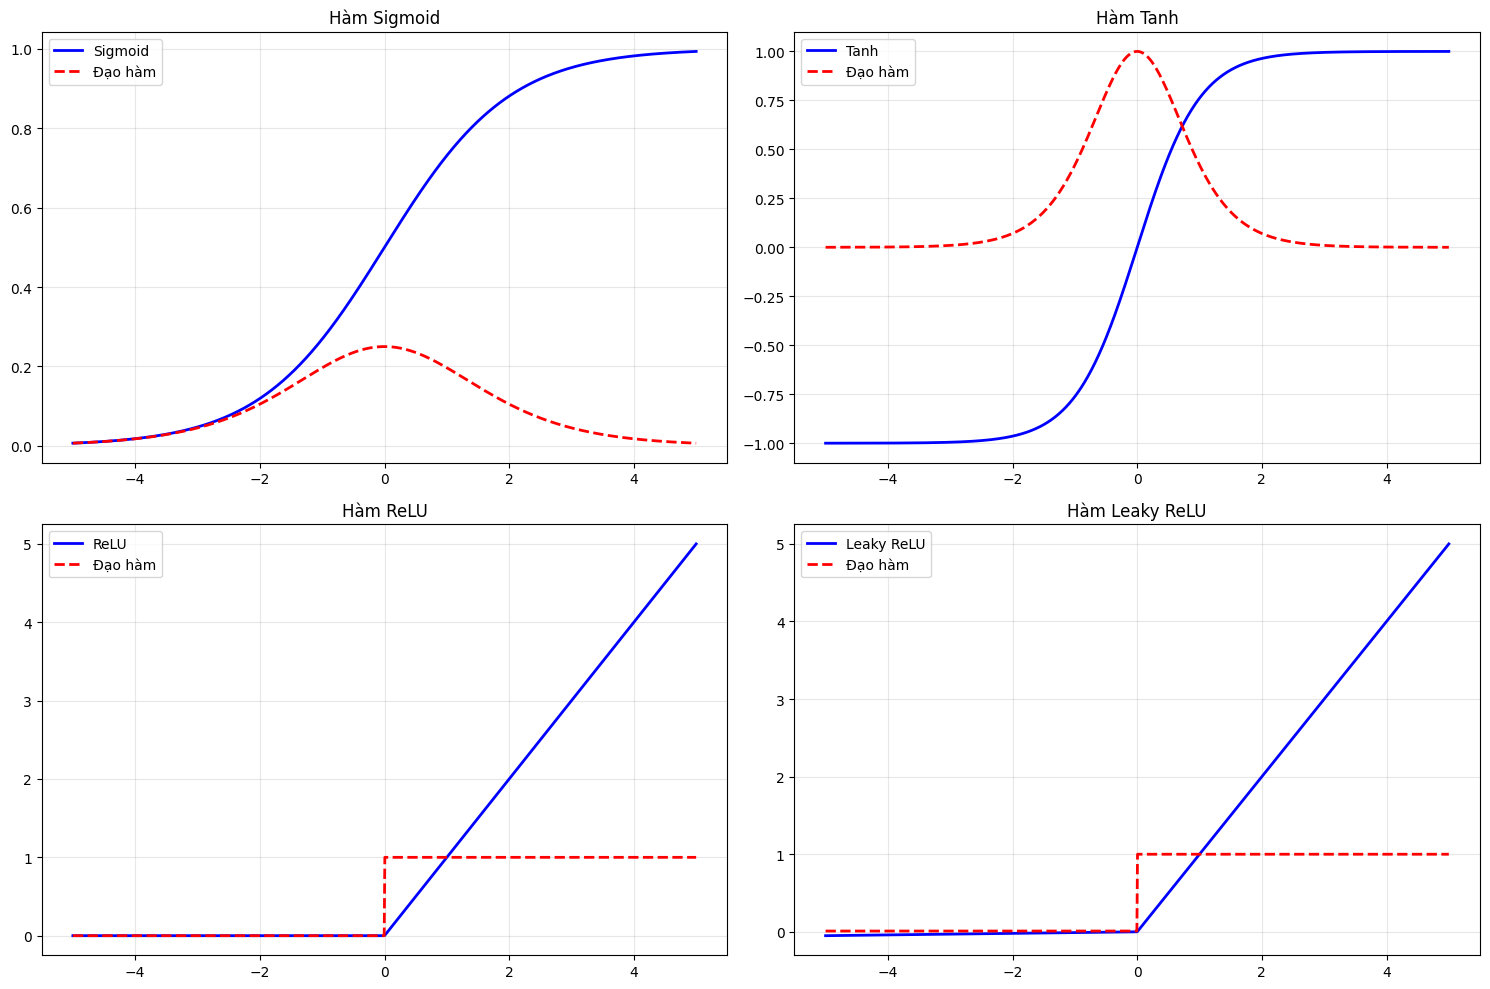

In [7]:
"""Ph·∫ßn 2: Multi-layer Perceptron - S·ª©c m·∫°nh c·ªßa nhi·ªÅu l·ªõp
Ki·∫øn tr√∫c MLP
Multi-layer Perceptron (MLP) l√† s·ª± m·ªü r·ªông c·ªßa Perceptron ƒë∆°n v·ªõi nhi·ªÅu l·ªõp neuron. N·∫øu Perceptron ƒë∆°n nh∆∞ m·ªôt ng∆∞·ªùi ra quy·∫øt ƒë·ªãnh ƒë∆°n gi·∫£n, th√¨ MLP nh∆∞ m·ªôt ·ªßy ban v·ªõi nhi·ªÅu chuy√™n gia, m·ªói ng∆∞·ªùi ƒë∆∞a ra √Ω ki·∫øn c·ªßa m√¨nh, v√† quy·∫øt ƒë·ªãnh cu·ªëi c√πng ƒë∆∞·ª£c h√¨nh th√†nh qua s·ª± t∆∞∆°ng t√°c ph·ª©c t·∫°p gi·ªØa t·∫•t c·∫£ c√°c √Ω ki·∫øn.
"""
class HamKichHoat:
    """
    L·ªõp ch·ª©a c√°c h√†m k√≠ch ho·∫°t v√† ƒë·∫°o h√†m c·ªßa ch√∫ng
    """
    
    @staticmethod
    def sigmoid(x):
        """H√†m sigmoid"""
        x = np.clip(x, -500, 500)  # Tr√°nh overflow
        return 1 / (1 + np.exp(-x))
    
    @staticmethod
    def sigmoid_dao_ham(x):
        """ƒê·∫°o h√†m c·ªßa sigmoid"""
        s = HamKichHoat.sigmoid(x)
        return s * (1 - s)
    
    @staticmethod
    def tanh(x):
        """H√†m tanh"""
        return np.tanh(x)
    
    @staticmethod
    def tanh_dao_ham(x):
        """ƒê·∫°o h√†m c·ªßa tanh"""
        return 1 - np.tanh(x) ** 2
    
    @staticmethod
    def relu(x):
        """H√†m ReLU"""
        return np.maximum(0, x)
    
    @staticmethod
    def relu_dao_ham(x):
        """ƒê·∫°o h√†m c·ªßa ReLU"""
        return (x > 0).astype(float)
    
    @staticmethod
    def leaky_relu(x, alpha=0.01):
        """H√†m Leaky ReLU"""
        return np.where(x > 0, x, alpha * x)
    
    @staticmethod
    def leaky_relu_dao_ham(x, alpha=0.01):
        """ƒê·∫°o h√†m c·ªßa Leaky ReLU"""
        return np.where(x > 0, 1, alpha)

# Tr·ª±c quan h√≥a c√°c h√†m k√≠ch ho·∫°t
def ve_ham_kich_hoat():
    """
    V·∫Ω bi·ªÉu ƒë·ªì c√°c h√†m k√≠ch ho·∫°t
    """
    x = np.linspace(-5, 5, 1000)
    
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # Sigmoid
    y_sigmoid = HamKichHoat.sigmoid(x)
    dy_sigmoid = HamKichHoat.sigmoid_dao_ham(x)
    axes[0, 0].plot(x, y_sigmoid, 'b-', linewidth=2, label='Sigmoid')
    axes[0, 0].plot(x, dy_sigmoid, 'r--', linewidth=2, label='ƒê·∫°o h√†m')
    axes[0, 0].set_title('H√†m Sigmoid')
    axes[0, 0].legend()
    axes[0, 0].grid(True, alpha=0.3)
    
    # Tanh
    y_tanh = HamKichHoat.tanh(x)
    dy_tanh = HamKichHoat.tanh_dao_ham(x)
    axes[0, 1].plot(x, y_tanh, 'b-', linewidth=2, label='Tanh')
    axes[0, 1].plot(x, dy_tanh, 'r--', linewidth=2, label='ƒê·∫°o h√†m')
    axes[0, 1].set_title('H√†m Tanh')
    axes[0, 1].legend()
    axes[0, 1].grid(True, alpha=0.3)
    
    # ReLU
    y_relu = HamKichHoat.relu(x)
    dy_relu = HamKichHoat.relu_dao_ham(x)
    axes[1, 0].plot(x, y_relu, 'b-', linewidth=2, label='ReLU')
    axes[1, 0].plot(x, dy_relu, 'r--', linewidth=2, label='ƒê·∫°o h√†m')
    axes[1, 0].set_title('H√†m ReLU')
    axes[1, 0].legend()
    axes[1, 0].grid(True, alpha=0.3)
    
    # Leaky ReLU
    y_leaky = HamKichHoat.leaky_relu(x)
    dy_leaky = HamKichHoat.leaky_relu_dao_ham(x)
    axes[1, 1].plot(x, y_leaky, 'b-', linewidth=2, label='Leaky ReLU')
    axes[1, 1].plot(x, dy_leaky, 'r--', linewidth=2, label='ƒê·∫°o h√†m')
    axes[1, 1].set_title('H√†m Leaky ReLU')
    axes[1, 1].legend()
    axes[1, 1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

print("=== C√ÅC H√ÄM K√çCH HO·∫†T ===")
ve_ham_kich_hoat()

In [ ]:
"""X√¢y d·ª±ng MLP ho√†n ch·ªânh"""
class MangNeuronNhanTao:
    """
    L·ªõp m·∫°ng neuron ƒëa l·ªõp ho√†n ch·ªânh v·ªõi thu·∫≠t to√°n lan truy·ªÅn ng∆∞·ª£c
    """
    
    def __init__(self, kich_thuoc_cac_lop: List[int], ham_kich_hoat: str = 'sigmoid', he_so_hoc: float = 0.01):
        """
        Kh·ªüi t·∫°o m·∫°ng neuron
        
        Args:
            kich_thuoc_cac_lop: Danh s√°ch s·ªë neuron trong t·ª´ng l·ªõp [ƒë·∫ßu_v√†o, ·∫©n1, ·∫©n2, ..., ƒë·∫ßu_ra]
            ham_kich_hoat: T√™n h√†m k√≠ch ho·∫°t ('sigmoid', 'tanh', 'relu', 'leaky_relu')
            he_so_hoc: T·ªëc ƒë·ªô h·ªçc
        """
        self.kich_thuoc_cac_lop = kich_thuoc_cac_lop
        self.so_lop = len(kich_thuoc_cac_lop)
        self.he_so_hoc = he_so_hoc
        
        # Thi·∫øt l·∫≠p h√†m k√≠ch ho·∫°t
        self.thiet_lap_ham_kich_hoat(ham_kich_hoat)
        
        # Kh·ªüi t·∫°o tr·ªçng s·ªë v√† bias
        self.khoi_tao_tham_so()
        
        # L∆∞u tr·ªØ l·ªãch s·ª≠ hu·∫•n luy·ªán
        self.lich_su_loss = []
        self.lich_su_accuracy = []
    
    def thiet_lap_ham_kich_hoat(self, ten_ham: str):
        """Thi·∫øt l·∫≠p h√†m k√≠ch ho·∫°t v√† ƒë·∫°o h√†m"""
        if ten_ham == 'sigmoid':
            self.ham_kich_hoat = HamKichHoat.sigmoid
            self.dao_ham_kich_hoat = HamKichHoat.sigmoid_dao_ham
        elif ten_ham == 'tanh':
            self.ham_kich_hoat = HamKichHoat.tanh
            self.dao_ham_kich_hoat = HamKichHoat.tanh_dao_ham
        elif ten_ham == 'relu':
            self.ham_kich_hoat = HamKichHoat.relu
            self.dao_ham_kich_hoat = HamKichHoat.relu_dao_ham
        elif ten_ham == 'leaky_relu':
            self.ham_kich_hoat = HamKichHoat.leaky_relu
            self.dao_ham_kich_hoat = HamKichHoat.leaky_relu_dao_ham
        else:
            raise ValueError(f"H√†m k√≠ch ho·∫°t '{ten_ham}' kh√¥ng ƒë∆∞·ª£c h·ªó tr·ª£")
    
    def khoi_tao_tham_so(self):
        """Kh·ªüi t·∫°o tr·ªçng s·ªë v√† bias theo ph∆∞∆°ng ph√°p Xavier"""
        self.trong_so = []
        self.bias = []
        
        for i in range(self.so_lop - 1):
            # Ph∆∞∆°ng ph√°p Xavier initialization
            fan_in = self.kich_thuoc_cac_lop[i]
            fan_out = self.kich_thuoc_cac_lop[i + 1]
            limit = np.sqrt(6 / (fan_in + fan_out))
            
            W = np.random.uniform(-limit, limit, (self.kich_thuoc_cac_lop[i], self.kich_thuoc_cac_lop[i + 1]))
            b = np.zeros((1, self.kich_thuoc_cac_lop[i + 1]))
            
            self.trong_so.append(W)
            self.bias.append(b)
    
    def lan_truyen_thuan(self, X: np.ndarray) -> Tuple[List[np.ndarray], List[np.ndarray]]:
        """
        Th·ª±c hi·ªán lan truy·ªÅn thu·∫≠n
        
        Args:
            X: D·ªØ li·ªáu ƒë·∫ßu v√†o shape (n_samples, n_features)
        
        Returns:
            activations: Danh s√°ch gi√° tr·ªã k√≠ch ho·∫°t t·∫°i m·ªói l·ªõp
            z_values: Danh s√°ch gi√° tr·ªã tr∆∞·ªõc khi k√≠ch ho·∫°t
        """
        activations = [X]  # L·ªõp ƒë·∫ßu v√†o
        z_values = []
        
        for i in range(self.so_lop - 1):
            # T√≠nh t·ªïng c√≥ tr·ªçng s·ªë
            z = np.dot(activations[i], self.trong_so[i]) + self.bias[i]
            z_values.append(z)
            
            # √Åp d·ª•ng h√†m k√≠ch ho·∫°t
            if i == self.so_lop - 2:  # L·ªõp cu·ªëi c√πng
                # S·ª≠ d·ª•ng sigmoid cho ƒë·∫ßu ra nh·ªã ph√¢n
                a = HamKichHoat.sigmoid(z)
            else:
                a = self.ham_kich_hoat(z)
            
            activations.append(a)
        
        return activations, z_values
    
    def lan_truyen_nguoc(self, X: np.ndarray, y: np.ndarray) -> Tuple[List[np.ndarray], List[np.ndarray]]:
        """
        Th·ª±c hi·ªán thu·∫≠t to√°n lan truy·ªÅn ng∆∞·ª£c
        
        Args:
            X: D·ªØ li·ªáu ƒë·∫ßu v√†o
            y: Nh√£n th·ª±c t·∫ø
        
        Returns:
            grad_w: Gradient c·ªßa tr·ªçng s·ªë
            grad_b: Gradient c·ªßa bias
        """
        m = X.shape[0]  # S·ªë m·∫´u
        
        # Lan truy·ªÅn thu·∫≠n
        activations, z_values = self.lan_truyen_thuan(X)
        
        # Kh·ªüi t·∫°o gradient
        grad_w = [np.zeros_like(w) for w in self.trong_so]
        grad_b = [np.zeros_like(b) for b in self.bias]
        
        # T√≠nh l·ªói ·ªü l·ªõp cu·ªëi
        delta = activations[-1] - y.reshape(-1, 1)
        
        # Lan truy·ªÅn ng∆∞·ª£c
        for i in range(self.so_lop - 2, -1, -1):
            # T√≠nh gradient cho tr·ªçng s·ªë v√† bias
            grad_w[i] = np.dot(activations[i].T, delta) / m
            grad_b[i] = np.mean(delta, axis=0, keepdims=True)
            
            # T√≠nh delta cho l·ªõp tr∆∞·ªõc ƒë√≥ (n·∫øu kh√¥ng ph·∫£i l·ªõp ƒë·∫ßu ti√™n)
            if i > 0:
                # Gradient t·ª´ l·ªõp ti·∫øp theo
                delta_prev = np.dot(delta, self.trong_so[i].T)
                
                # Nh√¢n v·ªõi ƒë·∫°o h√†m h√†m k√≠ch ho·∫°t
                delta = delta_prev * self.dao_ham_kich_hoat(z_values[i-1])
        
        return grad_w, grad_b
    
    def cap_nhat_tham_so(self, grad_w: List[np.ndarray], grad_b: List[np.ndarray]):
        """C·∫≠p nh·∫≠t tr·ªçng s·ªë v√† bias"""
        for i in range(len(self.trong_so)):
            self.trong_so[i] -= self.he_so_hoc * grad_w[i]
            self.bias[i] -= self.he_so_hoc * grad_b[i]
    
    def tinh_loss(self, y_thuc: np.ndarray, y_du_doan: np.ndarray) -> float:
        """T√≠nh Binary Cross Entropy Loss"""
        # Tr√°nh log(0)
        y_du_doan = np.clip(y_du_doan, 1e-15, 1 - 1e-15)
        return -np.mean(y_thuc * np.log(y_du_doan) + (1 - y_thuc) * np.log(1 - y_du_doan))
    
    def du_doan(self, X: np.ndarray) -> np.ndarray:
        """D·ª± ƒëo√°n cho d·ªØ li·ªáu m·ªõi"""
        activations, _ = self.lan_truyen_thuan(X)
        return activations[-1].flatten()
    
    def du_doan_lop(self, X: np.ndarray, nguong: float = 0.5) -> np.ndarray:
        """D·ª± ƒëo√°n l·ªõp (0 ho·∫∑c 1)"""
        y_prob = self.du_doan(X)
        return (y_prob >= nguong).astype(int)
    
    def huan_luyen(self, X: np.ndarray, y: np.ndarray, so_epoch: int = 1000, 
                  X_val: np.ndarray = None, y_val: np.ndarray = None, in_qua_trinh: bool = True):
        """
        Hu·∫•n luy·ªán m·∫°ng neuron
        
        Args:
            X: D·ªØ li·ªáu hu·∫•n luy·ªán
            y: Nh√£n hu·∫•n luy·ªán
            so_epoch: S·ªë epoch
            X_val: D·ªØ li·ªáu validation (t√πy ch·ªçn)
            y_val: Nh√£n validation (t√πy ch·ªçn)
            in_qua_trinh: In th√¥ng tin qu√° tr√¨nh
        """
        if in_qua_trinh:
            print(f"B·∫Øt ƒë·∫ßu hu·∫•n luy·ªán m·∫°ng neuron v·ªõi {so_epoch} epoch")
            print(f"Ki·∫øn tr√∫c m·∫°ng: {' -> '.join(map(str, self.kich_thuoc_cac_lop))}")
        
        for epoch in range(so_epoch):
            # Lan truy·ªÅn ng∆∞·ª£c v√† c·∫≠p nh·∫≠t
            grad_w, grad_b = self.lan_truyen_nguoc(X, y)
            self.cap_nhat_tham_so(grad_w, grad_b)
            
            # T√≠nh loss v√† accuracy
            if epoch % 100 == 0:
                y_pred = self.du_doan(X)
                loss = self.tinh_loss(y, y_pred)
                accuracy = np.mean((y_pred >= 0.5) == y)
                
                self.lich_su_loss.append(loss)
                self.lich_su_accuracy.append(accuracy)
                
                if in_qua_trinh:
                    thong_tin = f"Epoch {epoch:4d}: Loss = {loss:.4f}, Accuracy = {accuracy:.4f}"
                    
                    # Th√™m th√¥ng tin validation n·∫øu c√≥
                    if X_val is not None and y_val is not None:
                        y_val_pred = self.du_doan(X_val)
                        val_loss = self.tinh_loss(y_val, y_val_pred)
                        val_accuracy = np.mean((y_val_pred >= 0.5) == y_val)
                        thong_tin += f", Val_Loss = {val_loss:.4f}, Val_Acc = {val_accuracy:.4f}"
                    
                    print(thong_tin)
    
    def ve_bieu_do_huan_luyen(self):
        """V·∫Ω bi·ªÉu ƒë·ªì qu√° tr√¨nh hu·∫•n luy·ªán"""
        if not self.lich_su_loss:
            print("Ch∆∞a c√≥ d·ªØ li·ªáu hu·∫•n luy·ªán ƒë·ªÉ v·∫Ω bi·ªÉu ƒë·ªì")
            return
        
        fig, axes = plt.subplots(1, 2, figsize=(15, 5))
        
        epochs = range(0, len(self.lich_su_loss) * 100, 100)
        
        # Bi·ªÉu ƒë·ªì Loss
        axes[0].plot(epochs, self.lich_su_loss, 'b-', linewidth=2)
        axes[0].set_title('Qu√° tr√¨nh gi·∫£m Loss')
        axes[0].set_xlabel('Epoch')
        axes[0].set_ylabel('Loss')
        axes[0].grid(True, alpha=0.3)
        
        # Bi·ªÉu ƒë·ªì Accuracy
        axes[1].plot(epochs, self.lich_su_accuracy, 'g-', linewidth=2)
        axes[1].set_title('Qu√° tr√¨nh tƒÉng Accuracy')
        axes[1].set_xlabel('Epoch')
        axes[1].set_ylabel('Accuracy')
        axes[1].grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()
    
    def in_thong_tin_mang(self):
        """In th√¥ng tin chi ti·∫øt v·ªÅ m·∫°ng"""
        print(f"=== TH√îNG TIN M·∫†NG NEURON ===")
        print(f"Ki·∫øn tr√∫c: {' -> '.join(map(str, self.kich_thuoc_cac_lop))}")
        print(f"S·ªë l·ªõp: {self.so_lop}")
        print(f"T·ªïng s·ªë tham s·ªë: {sum(w.size for w in self.trong_so) + sum(b.size for b in self.bias)}")
        
        for i, (w, b) in enumerate(zip(self.trong_so, self.bias)):
            print(f"L·ªõp {i+1}: Tr·ªçng s·ªë {w.shape}, Bias {b.shape}")

            

=== GI·∫¢I QUY·∫æT B√ÄI TO√ÅN XOR V·ªöI MLP ===
=== TH√îNG TIN M·∫†NG NEURON ===
Ki·∫øn tr√∫c: 2 -> 4 -> 1
S·ªë l·ªõp: 3
T·ªïng s·ªë tham s·ªë: 17
L·ªõp 1: Tr·ªçng s·ªë (2, 4), Bias (1, 4)
L·ªõp 2: Tr·ªçng s·ªë (4, 1), Bias (1, 1)
B·∫Øt ƒë·∫ßu hu·∫•n luy·ªán m·∫°ng neuron v·ªõi 2000 epoch
Ki·∫øn tr√∫c m·∫°ng: 2 -> 4 -> 1
Epoch    0: Loss = 0.6941, Accuracy = 0.5000
Epoch  100: Loss = 0.6811, Accuracy = 0.5000
Epoch  200: Loss = 0.5740, Accuracy = 0.7500
Epoch  300: Loss = 0.4278, Accuracy = 0.7500
Epoch  400: Loss = 0.2285, Accuracy = 1.0000
Epoch  500: Loss = 0.1041, Accuracy = 1.0000
Epoch  600: Loss = 0.0559, Accuracy = 1.0000
Epoch  700: Loss = 0.0354, Accuracy = 1.0000
Epoch  800: Loss = 0.0249, Accuracy = 1.0000
Epoch  900: Loss = 0.0189, Accuracy = 1.0000
Epoch 1000: Loss = 0.0150, Accuracy = 1.0000
Epoch 1100: Loss = 0.0123, Accuracy = 1.0000
Epoch 1200: Loss = 0.0104, Accuracy = 1.0000
Epoch 1300: Loss = 0.0090, Accuracy = 1.0000
Epoch 1400: Loss = 0.0079, Accuracy = 1.0000
Ep

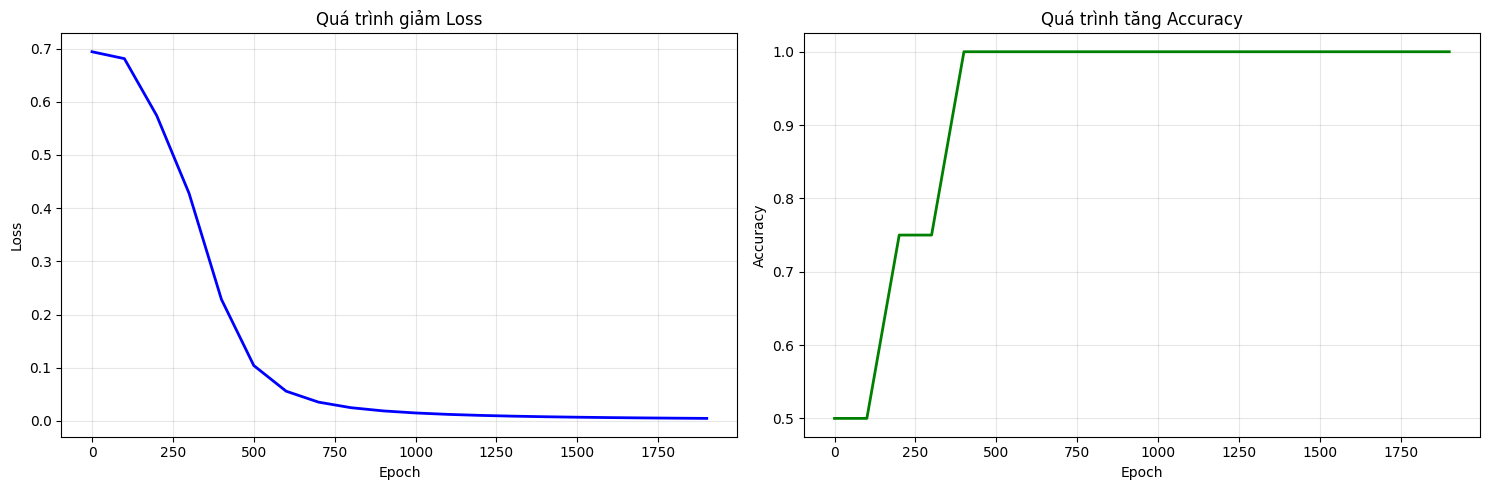

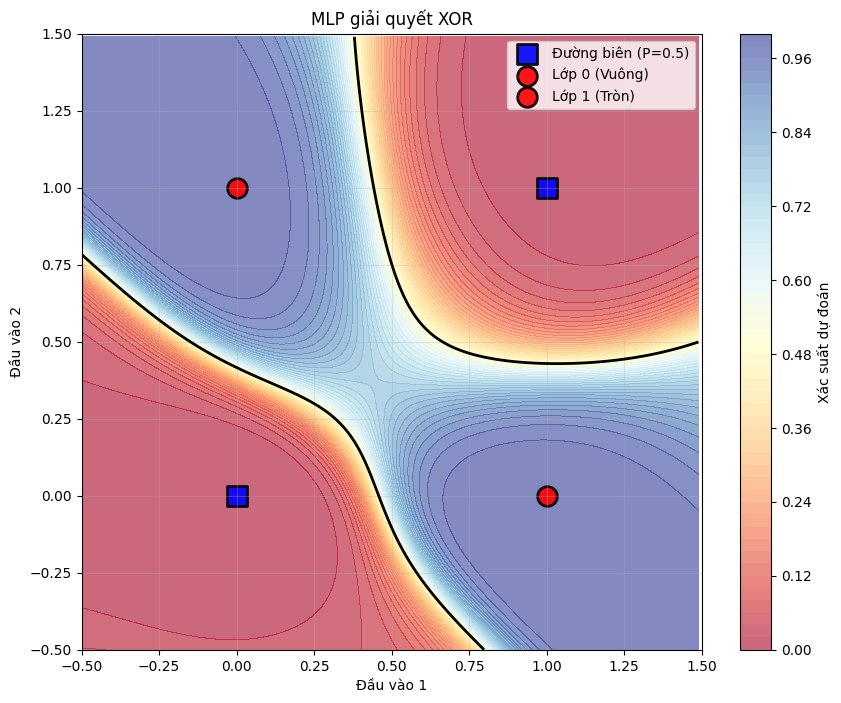

In [12]:
"""B√¢y gi·ªù ch√∫ng ta s·∫Ω s·ª≠ d·ª•ng MLP ƒë·ªÉ gi·∫£i quy·∫øt b√†i to√°n XOR m√† Perceptron ƒë∆°n kh√¥ng th·ªÉ x·ª≠ l√Ω ƒë∆∞·ª£c:"""

def bai_toan_xor_voi_mlp():
    """
    Gi·∫£i quy·∫øt b√†i to√°n XOR b·∫±ng MLP
    """
    print("=== GI·∫¢I QUY·∫æT B√ÄI TO√ÅN XOR V·ªöI MLP ===")
    
    # D·ªØ li·ªáu XOR
    X_xor = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    y_xor = np.array([0, 1, 1, 0])
    
    # T·∫°o m·∫°ng v·ªõi 1 l·ªõp ·∫©n
    mlp = MangNeuronNhanTao(
        kich_thuoc_cac_lop=[2, 4, 1],  # 2 ƒë·∫ßu v√†o, 4 neuron ·∫©n, 1 ƒë·∫ßu ra
        ham_kich_hoat='sigmoid',
        he_so_hoc=1.0
    )
    
    mlp.in_thong_tin_mang()
    
    # Hu·∫•n luy·ªán
    mlp.huan_luyen(X_xor, y_xor, so_epoch=2000)
    
    # Ki·ªÉm tra k·∫øt qu·∫£
    print(f"\n=== K·∫æT QU·∫¢ GI·∫¢I XOR ===")
    for i, (x, y_thuc) in enumerate(zip(X_xor, y_xor)):
        y_prob = mlp.du_doan(x.reshape(1, -1))[0]
        y_du_doan = int(y_prob >= 0.5)
        print(f"ƒê·∫ßu v√†o: {x} -> X√°c su·∫•t: {y_prob:.4f}, D·ª± ƒëo√°n: {y_du_doan}, Th·ª±c t·∫ø: {y_thuc}")
    
    # T√≠nh ƒë·ªô ch√≠nh x√°c
    y_pred_all = mlp.du_doan_lop(X_xor)
    accuracy = np.mean(y_pred_all == y_xor)
    print(f"\nƒê·ªô ch√≠nh x√°c: {accuracy:.4f}")
    
    # V·∫Ω bi·ªÉu ƒë·ªì hu·∫•n luy·ªán
    mlp.ve_bieu_do_huan_luyen()
    
    return mlp

# Ch·∫°y b√†i to√°n XOR
mlp_xor = bai_toan_xor_voi_mlp()

"""Tr·ª±c quan h√≥a quy·∫øt ƒë·ªãnh c·ªßa MLP"""

def ve_vung_quyet_dinh_mlp(mlp, X, y, do_phan_giai=0.01, tieu_de="V√πng quy·∫øt ƒë·ªãnh MLP"):
    """
    V·∫Ω v√πng quy·∫øt ƒë·ªãnh c·ªßa MLP cho b√†i to√°n 2D
    """
    plt.figure(figsize=(10, 8))
    
    # T·∫°o l∆∞·ªõi ƒëi·ªÉm
    x_min, x_max = -0.5, 1.5
    y_min, y_max = -0.5, 1.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, do_phan_giai),
                         np.arange(y_min, y_max, do_phan_giai))
    
    # D·ª± ƒëo√°n cho t·ª´ng ƒëi·ªÉm tr√™n l∆∞·ªõi
    luoi_diem = np.c_[xx.ravel(), yy.ravel()]
    Z = mlp.du_doan(luoi_diem)
    Z = Z.reshape(xx.shape)
    
    # V·∫Ω v√πng quy·∫øt ƒë·ªãnh
    plt.contourf(xx, yy, Z, levels=50, alpha=0.6, cmap='RdYlBu')
    plt.colorbar(label='X√°c su·∫•t d·ª± ƒëo√°n')
    
    # V·∫Ω ƒë∆∞·ªùng bi√™n quy·∫øt ƒë·ªãnh
    plt.contour(xx, yy, Z, levels=[0.5], colors='black', linewidths=2)
    
    # V·∫Ω c√°c ƒëi·ªÉm d·ªØ li·ªáu
    for i in range(len(X)):
        mau = 'red' if y[i] == 1 else 'blue'
        ky_hieu = 'o' if y[i] == 1 else 's'
        plt.scatter(X[i, 0], X[i, 1], c=mau, marker=ky_hieu, s=200, 
                   edgecolors='black', linewidth=2, alpha=0.9)
    
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xlabel('ƒê·∫ßu v√†o 1')
    plt.ylabel('ƒê·∫ßu v√†o 2')
    plt.title(tieu_de)
    plt.legend(['ƒê∆∞·ªùng bi√™n (P=0.5)', 'L·ªõp 0 (Vu√¥ng)', 'L·ªõp 1 (Tr√≤n)'])
    plt.grid(True, alpha=0.3)
    plt.show()

# V·∫Ω v√πng quy·∫øt ƒë·ªãnh cho XOR
X_xor = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_xor = np.array([0, 1, 1, 0])
ve_vung_quyet_dinh_mlp(mlp_xor, X_xor, y_xor, tieu_de="MLP gi·∫£i quy·∫øt XOR")

In [ ]:
"""Ph·∫ßn 4: B√†i th·ª±c h√†nh n√¢ng cao - Ph√¢n lo·∫°i d·ªØ li·ªáu th·ª±c t·∫ø"""
def tao_du_lieu_phan_loai_phuc_tap():
    """
    T·∫°o d·ªØ li·ªáu ph√¢n lo·∫°i ph·ª©c t·∫°p ƒë·ªÉ ki·ªÉm tra MLP
    """
    np.random.seed(42)
    
    # T·∫°o d·ªØ li·ªáu d·∫°ng h√¨nh tr√≤n ƒë·ªìng t√¢m
    n_samples = 1000
    
    # L·ªõp 0: V√≤ng tr√≤n trong
    r1 = np.random.uniform(0, 1, n_samples // 2)
    theta1 = np.random.uniform(0, 2*np.pi, n_samples // 2)
    X1 = np.column_stack([r1 * np.cos(theta1), r1 * np.sin(theta1)])
    y1 = np.zeros(n_samples // 2)
    
    # L·ªõp 1: V√≤ng tr√≤n ngo√†i
    r2 = np.random.uniform(1.5, 2.5, n_samples // 2)
    theta2 = np.random.uniform(0, 2*np.pi, n_samples // 2)
    X2 = np.column_stack([r2 * np.cos(theta2), r2 * np.sin(theta2)])
    y2 = np.ones(n_samples // 2)
    
    # K·∫øt h·ª£p d·ªØ li·ªáu
    X = np.vstack([X1, X2])
    y = np.hstack([y1, y2])
    
    # X√°o tr·ªôn d·ªØ li·ªáu
    idx = np.random.permutation(len(X))
    X, y = X[idx], y[idx]
    
    return X, y

def so_sanh_cac_kich_hoat():
    """
    So s√°nh hi·ªáu qu·∫£ c·ªßa c√°c h√†m k√≠ch ho·∫°t kh√°c nhau
    """
    print("=== SO S√ÅNH C√ÅC H√ÄM K√çCH HO·∫†T ===")
    
    # T·∫°o d·ªØ li·ªáu
    X, y = tao_du_lieu_phan_loai_phuc_tap()
    
    # Chia d·ªØ li·ªáu train/test
    n_train = int(0.8 * len(X))
    X_train, X_test = X[:n_train], X[n_train:]
    y_train, y_test = y[:n_train], y[n_train:]
    
    # C√°c h√†m k√≠ch ho·∫°t ƒë·ªÉ th·ª≠
    ham_kich_hoat = ['sigmoid', 'tanh', 'relu']
    ket_qua = {}
    
    plt.figure(figsize=(15, 10))
    
    for i, ham in enumerate(ham_kich_hoat):
        print(f"\nHu·∫•n luy·ªán v·ªõi h√†m {ham}...")
        
        # T·∫°o v√† hu·∫•n luy·ªán m√¥ h√¨nh
        mlp = MangNeuronNhanTao(
            kich_thuoc_cac_lop=[2, 10, 8, 1],
            ham_kich_hoat=ham,
            he_so_hoc=0.1
        )
        
        mlp.huan_luyen(X_train, y_train, so_epoch=1000, in_qua_trinh=False)
        
        # ƒê√°nh gi√°
        y_pred_train = mlp.du_doan_lop(X_train)
        y_pred_test = mlp.du_doan_lop(X_test)
        
        train_acc = np.mean(y_pred_train == y_train)
        test_acc = np.mean(y_pred_test == y_test)
        
        ket_qua[ham] = {
            'train_accuracy': train_acc,
            'test_accuracy': test_acc,
            'model': mlp
        }
        
        print(f"ƒê·ªô ch√≠nh x√°c train: {train_acc:.4f}")
        print(f"ƒê·ªô ch√≠nh x√°c test: {test_acc:.4f}")
        
        # V·∫Ω v√πng quy·∫øt ƒë·ªãnh
        plt.subplot(2, 3, i+1)
        
        # T·∫°o l∆∞·ªõi
        x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
        y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                            np.linspace(y_min, y_max, 100))
        
        # D·ª± ƒëo√°n
        Z = mlp.du_doan(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        
        # V·∫Ω
        plt.contourf(xx, yy, Z, levels=50, alpha=0.6, cmap='RdYlBu')
        scatter = plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='RdYlBu', edgecolors='black')
        plt.title(f'{ham.upper()}\nTest Acc: {test_acc:.3f}')
        plt.xlabel('X1')
        plt.ylabel('X2')
        
        # V·∫Ω bi·ªÉu ƒë·ªì loss
        plt.subplot(2, 3, i+4)
        epochs = range(0, len(mlp.lich_su_loss) * 100, 100)
        plt.plot(epochs, mlp.lich_su_loss, linewidth=2)
        plt.title(f'Loss - {ham.upper()}')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # T√≥m t·∫Øt k·∫øt qu·∫£
    print(f"\n=== T√ìM T·∫ÆT K·∫æT QU·∫¢ ===")
    for ham, kq in ket_qua.items():
        print(f"{ham.upper()}: Train = {kq['train_accuracy']:.4f}, Test = {kq['test_accuracy']:.4f}")
    
    return ket_qua

# Ch·∫°y so s√°nh
ket_qua_so_sanh = so_sanh_cac_kich_hoat()